In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

import tensorflow as tf
keras = tf.keras

from keras.preprocessing.sequence import TimeseriesGenerator
from keras.models import Sequential, load_model
from keras.layers import Dense, LSTM

In [2]:
mazdock_data = pd.read_csv('/kaggle/input/nse-defence-stocks-india/MAZDOCK.NS.csv', index_col='Date')

In [3]:
mazdock_data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-10-12,214.899994,216.949997,164.000000,168.050003,156.392517,71230692
2020-10-19,170.750000,179.000000,165.399994,175.399994,163.232620,13237263
2020-10-26,175.949997,175.949997,165.000000,166.750000,155.182693,4493332
2020-11-02,166.750000,174.000000,165.100006,170.050003,158.253769,6034433
2020-11-09,172.000000,190.800003,170.750000,188.250000,175.191238,21400741


<AxesSubplot:xlabel='Date'>

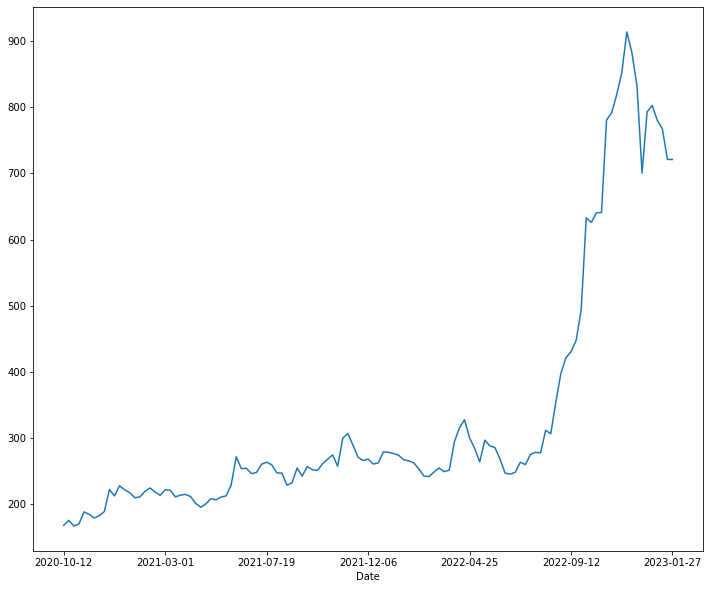

In [4]:
mazdock_data['Close'].plot(figsize=(12,10))

In [5]:
mazdock_data = mazdock_data.dropna()

In [6]:
scaled_mazdock_data = scaler.fit_transform(mazdock_data)

In [7]:
scaled_mazdock_data.shape

(121, 6)

In [8]:
look_back = 6

mazdock_data_generator = TimeseriesGenerator(scaled_mazdock_data, scaled_mazdock_data, length=look_back, batch_size=1)

In [9]:
mazdock_model = Sequential()

n_features = scaled_mazdock_data.shape[1]

mazdock_model.add(LSTM(128, activation='relu', return_sequences=True , input_shape=(look_back,n_features)))
mazdock_model.add(LSTM(256, activation='relu', return_sequences=True, input_shape=(look_back,n_features)))
mazdock_model.add(LSTM(512, activation='relu',  input_shape=(look_back,n_features)))

mazdock_model.add(Dense(n_features))

mazdock_model.compile(optimizer='adam', loss='mse')

2023-02-04 04:02:31.494962: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [10]:
mazdock_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 6, 128)            69120     
_________________________________________________________________
lstm_1 (LSTM)                (None, 6, 256)            394240    
_________________________________________________________________
lstm_2 (LSTM)                (None, 512)               1574912   
_________________________________________________________________
dense (Dense)                (None, 6)                 3078      
Total params: 2,041,350
Trainable params: 2,041,350
Non-trainable params: 0
_________________________________________________________________


In [11]:
mazdock_model.fit(mazdock_data_generator, epochs=500)

2023-02-04 04:02:34.747119: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/500
115/115 [==============================] - 8s 30ms/step - loss: 0.0334
Epoch 2/500
115/115 [==============================] - 3s 30ms/step - loss: 0.0155
Epoch 3/500
115/115 [==============================] - 4s 31ms/step - loss: 0.0197
Epoch 4/500
115/115 [==============================] - 3s 30ms/step - loss: 0.0107
Epoch 5/500
115/115 [==============================] - 4s 31ms/step - loss: 0.0115
Epoch 6/500
115/115 [==============================] - 4s 30ms/step - loss: 0.0134
Epoch 7/500
115/115 [==============================] - 4s 30ms/step - loss: 0.0104
Epoch 8/500
115/115 [==============================] - 3s 28ms/step - loss: 0.0078
Epoch 9/500
115/115 [==============================] - 3s 28ms/step - loss: 0.0063
Epoch 10/500
115/115 [==============================] - 3s 29ms/step - loss: 0.0062
Epoch 11/500
115/115 [==============================] - 4s 36ms/step - loss: 0.0070
Epoch 12/500
115/115 [==============================] - 3s 29ms/step - loss: 0.0062
E

In [12]:
mazdock_model.save('/kaggle/working/mazdock_model.h5')

<AxesSubplot:>

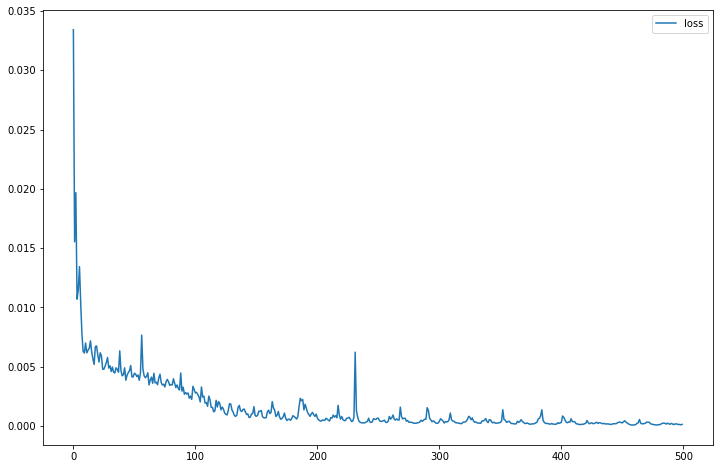

In [13]:
mazdock_loss = pd.DataFrame(mazdock_model.history.history)
mazdock_loss.plot(figsize=(12,8))

In [14]:
# for exporting important objects of model
import joblib

# create PKL files of important objects required for project
# these are required for prediction of future stock prices and also for the flask app
joblib.dump(scaler, "/kaggle/working/scaler.pkl")
joblib.dump(scaled_mazdock_data, "/kaggle/working/scaled_mazdock_data.pkl")
joblib.dump(look_back, "/kaggle/working/look_back.pkl")

['/kaggle/working/look_back.pkl']